### Final Project
### CSC 478
#### Kristen Groom
#### 5/30/18

#### I have chosen to do a complete data analysis on a dataset that I found via the Kaggle website at the following url: https://www.kaggle.com/rounakbanik/ted-talks. 

#### I have chosen this dataset because I noticed that there are columns in the .csv file that are dictionaries with keywords and counts of word ratings from users for each talk.  I initially thought that there were lists of words spoken in the talk but on further inspection, I realized that these are user ratings.  The set also has popularity ratings for each talk based on views.  I would like to understand the trends of most popular talks and use the methods that we have been learning in class to predict how popular various talks will likely be based on user word ratings in the talk. 

1) I will begin by exploring the general characteristics of the data as a whole using statistics associated with the numerical attributes as well as normalizing data as needed:

In [1]:
# import needed libraries for assignment:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the data as a pandas DataFrame:
ted = pd.read_csv("ted_main.csv")

In [3]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
# looking at basic description and size of data
# viewing basic descriptions of the data:
print(ted.dtypes)
print(ted.shape)

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object
(2550, 17)


In [5]:
ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


I can see that this basic analysis of the full data set gives me some information about the nature of the
talks, I can see that on average, there are almost 200 comments, and over 1.6 million views.  I can see that on average, the talks are interpreted into 27 different languages and generally, each talk is given by only one person.  I can also look at the duration of each talk is approximately 800 seconds or about 13 minutes.  I would like to look at some of these variables to see if they are related to one another in the following section.  I will then go on to extract the information from the ratings in order to perform machine learning tasks on the data.

In [6]:
# I will start with a basic correlation analysis of numerical values:
ted.corr()

,comments,duration,film_date,languages,num_speaker,published_date,views
comments,1.000000,0.140694,-0.133303,0.318284,-0.035489,-0.185936,0.530939
duration,0.140694,1.000000,-0.242941,-0.295681,0.022257,-0.166324,0.048740
film_date,-0.133303,-0.242941,1.000000,-0.061957,0.040227,0.902565,0.006447
languages,0.318284,-0.295681,-0.061957,1.000000,-0.063100,-0.171836,0.377623
num_speaker,-0.035489,0.022257,0.040227,-0.063100,1.000000,0.049240,-0.026389
published_date,-0.185936,-0.166324,0.902565,-0.171836,0.049240,1.000000,-0.017920
views,0.530939,0.048740,0.006447,0.377623,-0.026389,-0.017920,1.000000


In looking at a correlation table, I see that there is a positive correlation between comments and views.  I also see a small positive correlation between languages and comments and views.  I will explore these in more detail.

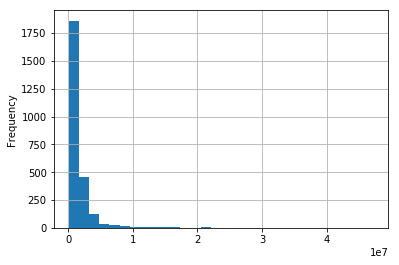

In [7]:
# histogram for views
ted['views'].plot(kind='hist', bins=30, grid=True)

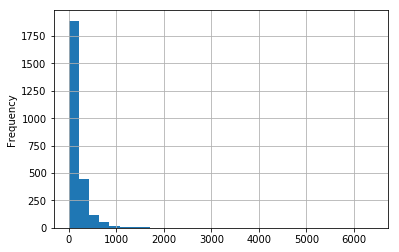

In [8]:
# histogram for comments
ted['comments'].plot(kind='hist', bins=30, grid=True)

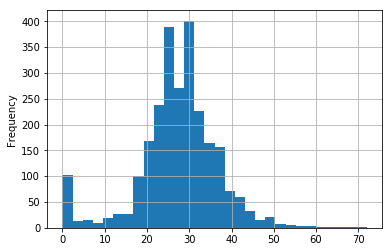

In [9]:
# histogram for languages
ted['languages'].plot(kind='hist', bins=30, grid=True)

I see that the histograms for comments and views are very similar which also affirms their positive correlation.  I see that the languages is fairly normally distributed, yet appears to be bi-modal.

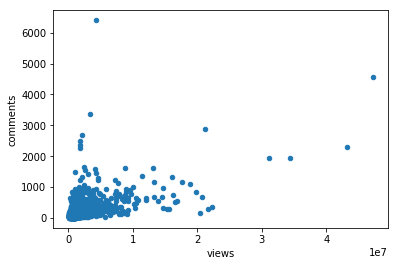

In [10]:
# using pyplot to create a scatterplot 
ted.plot(x="views", y="comments", kind="scatter")

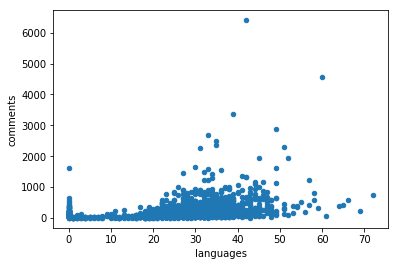

In [11]:
ted.plot(x="languages", y="comments", kind="scatter")

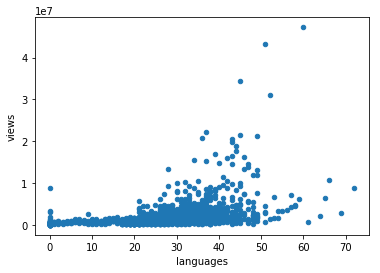

In [12]:
ted.plot(x="languages", y="views", kind="scatter")

The graphs are reaffirming what we saw above in the correlation analysis, that views and comments do have a positive correlation and that languages and views, and languages and comments have a slight positive correlation

In [13]:
import seaborn as sns

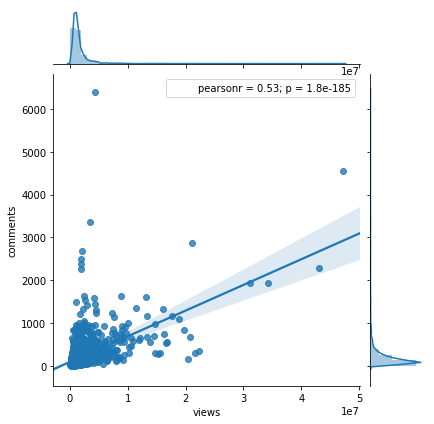

In [14]:
# I have learned a bit about seaborn and I like its visualization capabilities
# so I can look at the variables with a little more information using jointplot which
# will give us a scatter plot, with regression line as well as the individual distributions of views and comments:
sns.jointplot(x='views',y='comments',data=ted,kind='reg')

I can see that the views and comments have similar distributions and I see the pearson correlation value as we saw above that shows us 0.53 correlation

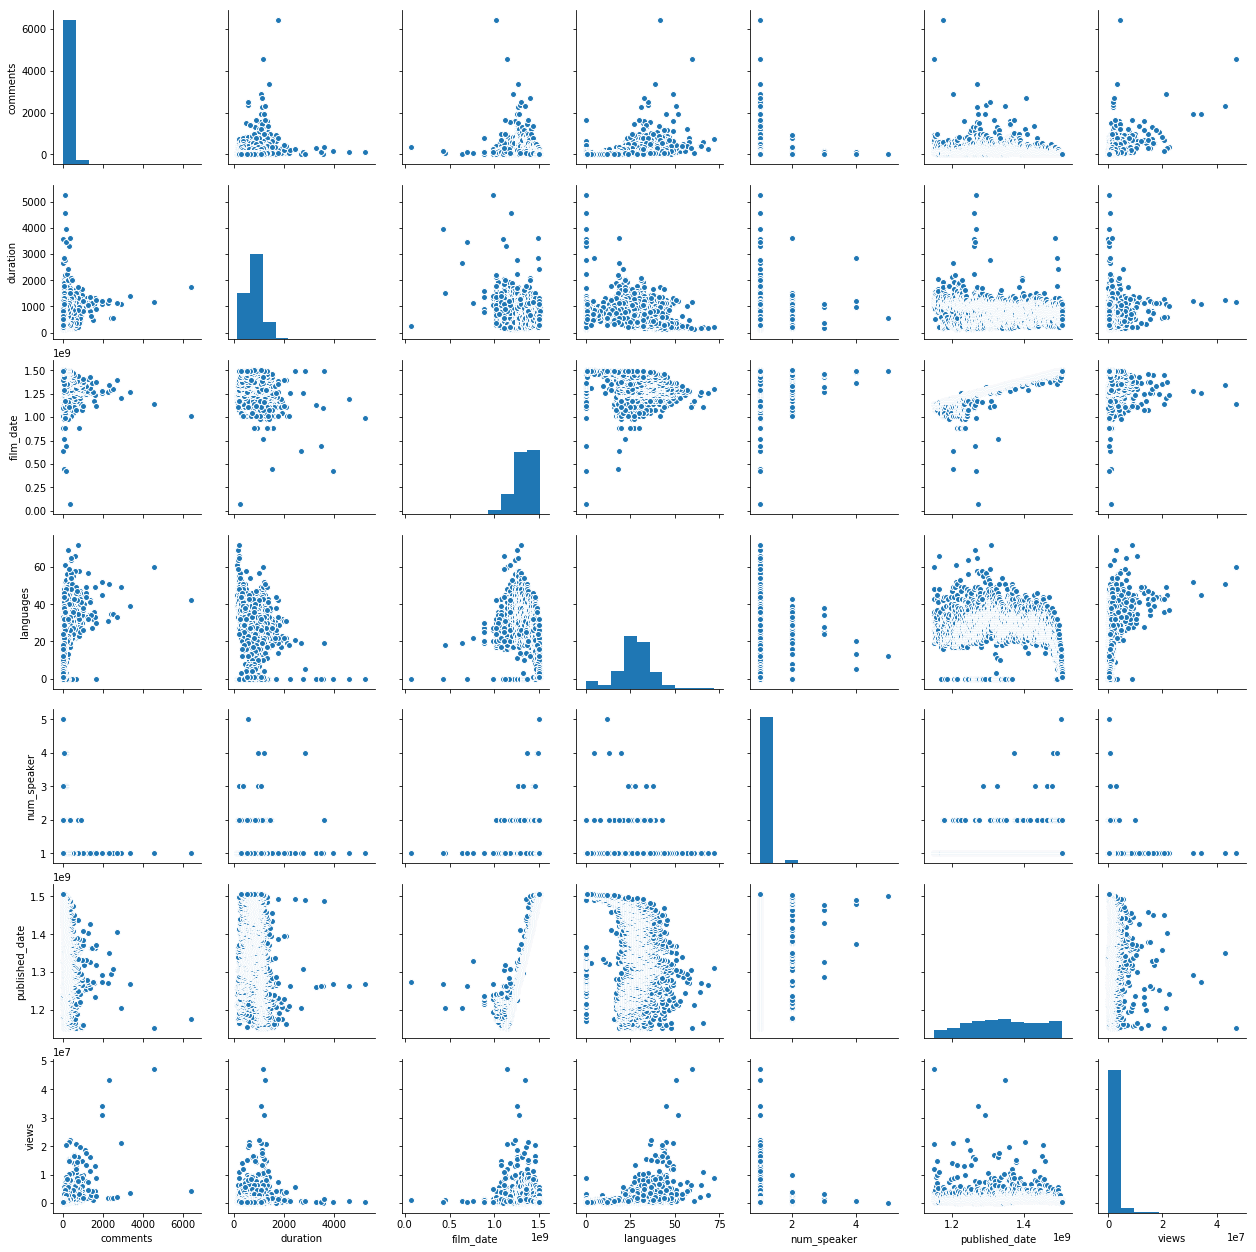

In [15]:
# I can also look at the data using pairplot, which is basically the same as the correlation table
# but using visualizations rather than just numbers and the distributions are found along the diagonal:
sns.pairplot(ted)

In [16]:
# I want to create a dataframe to use as a key with the description, speaker, name, speaker_occupation, and url
# to use later for printing out information:
keys = ted[['description', 'main_speaker', 'name', 'speaker_occupation', 'title', 'related_talks', 'url','tags']]

In [17]:
keys.head(5)

,description,main_speaker,name,speaker_occupation,title,related_talks,url,tags
0,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Ken Robinson: Do schools kill creativity?,Author/educator,Do schools kill creativity?,"[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,"['children', 'creativity', 'culture', 'dance',..."
1,With the same humor and humanity he exuded in ...,Al Gore,Al Gore: Averting the climate crisis,Climate advocate,Averting the climate crisis,"[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,"['alternative energy', 'cars', 'climate change..."
2,New York Times columnist David Pogue takes aim...,David Pogue,David Pogue: Simplicity sells,Technology columnist,Simplicity sells,"[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,"['computers', 'entertainment', 'interface desi..."
3,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Majora Carter: Greening the ghetto,Activist for environmental justice,Greening the ghetto,"[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,"['MacArthur grant', 'activism', 'business', 'c..."
4,You've never seen data presented like this. Wi...,Hans Rosling,Hans Rosling: The best stats you've ever seen,Global health expert; data visionary,The best stats you've ever seen,"[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,"['Africa', 'Asia', 'Google', 'demo', 'economic..."


In [18]:
# Ok, now I can drop the columns from the keys dataframe as well as some other columns
# that I will not be using for the analysis
# so I'll drop those columns:
ted = ted.drop(['description','main_speaker', 'name', 'speaker_occupation', 'title','film_date',
               'num_speaker', 'related_talks','published_date', 'url', 'duration', 'languages','tags'], axis=1)

In [19]:
ted.head(10)

,comments,event,ratings,views
0,4553,TED2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110
1,265,TED2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520
2,124,TED2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292
3,200,TED2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",1697550
4,593,TED2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",12005869
5,672,TED2006,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...",20685401
6,919,TED2006,"[{'id': 3, 'name': 'Courageous', 'count': 477}...",3769987
7,46,TED2006,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...",967741
8,852,TED2006,"[{'id': 3, 'name': 'Courageous', 'count': 562}...",2567958
9,900,TED2006,"[{'id': 21, 'name': 'Unconvincing', 'count': 8...",3095993


In [20]:
# I'm curious to see how many events this data set is covering so I'll use groupby here:
by_date = ted.groupby('event')

In [21]:
by_date.count()

,comments,ratings,views
event,,,
AORN Congress,1,1,1
Arbejdsglaede Live,1,1,1
BBC TV,1,1,1
Bowery Poetry Club,1,1,1
Business Innovation Factory,3,3,3
Carnegie Mellon University,1,1,1
Chautauqua Institution,3,3,3
DICE Summit 2010,1,1,1
DLD 2007,1,1,1


In [22]:
# I will not use this information because there are quite a few categories so I'll add this column
# to the keys dataframe and then drop it from ted
keys['event'] = ted['event']

/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
ted = ted.drop('event', axis=1)

In [24]:
ted.head(3)

,comments,ratings,views
0,4553,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",47227110
1,265,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",3200520
2,124,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",1636292


In [25]:
# I'm going to put views into a target dataframe, to use with classification tasks.
# I could use comments as well, however, because they are similarly
target = ted['views']

In [26]:
target.head()

0    47227110
1     3200520
2     1636292
3     1697550
4    12005869
Name: views, dtype: int64

In [27]:
# remove comments and views and then we will be left with the list of dictionary ratings
ted = ted.drop(['comments','views'], axis=1)

In [28]:
ted.head()

,ratings
0,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {..."
1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i..."
2,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i..."
3,"[{'id': 3, 'name': 'Courageous', 'count': 760}..."
4,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}..."


In [29]:
# I now need to turn the list of dictionary ratings into their own columns with heading being names 
# and count listed below
# I started by putting the ratings into a list
ratings_string = ted['ratings'].tolist()

In [30]:
ratings_string
# I can see that this list is a list of strings rather than a list of dictionaries

["[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]",
 "[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443},

In [31]:
# So after some googling, I found that the ast library evalutes strings into python datastructures
import ast
ratings = np.array([ast.literal_eval(rlist) for rlist in ratings_string])

In [32]:
ratings

array([[{'count': 19645, 'id': 7, 'name': 'Funny'},
        {'count': 4573, 'id': 1, 'name': 'Beautiful'},
        {'count': 6073, 'id': 9, 'name': 'Ingenious'}, ...,
        {'count': 1174, 'id': 25, 'name': 'OK'},
        {'count': 209, 'id': 26, 'name': 'Obnoxious'},
        {'count': 24924, 'id': 10, 'name': 'Inspiring'}],
       [{'count': 544, 'id': 7, 'name': 'Funny'},
        {'count': 139, 'id': 3, 'name': 'Courageous'},
        {'count': 62, 'id': 2, 'name': 'Confusing'}, ...,
        {'count': 116, 'id': 23, 'name': 'Jaw-dropping'},
        {'count': 131, 'id': 26, 'name': 'Obnoxious'},
        {'count': 203, 'id': 25, 'name': 'OK'}],
       [{'count': 964, 'id': 7, 'name': 'Funny'},
        {'count': 45, 'id': 3, 'name': 'Courageous'},
        {'count': 183, 'id': 9, 'name': 'Ingenious'}, ...,
        {'count': 230, 'id': 24, 'name': 'Persuasive'},
        {'count': 54, 'id': 23, 'name': 'Jaw-dropping'},
        {'count': 142, 'id': 26, 'name': 'Obnoxious'}],
       ..., 
 

In [33]:
# just checking to see how to access info from this list
(ratings[0][0]).get('name')

'Funny'

In [34]:
# I'm turning ratings into a dataframe so I can get more information later on if needed:
df_ratings = pd.DataFrame(ratings)
df_ratings.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"{u'count': 19645, u'id': 7, u'name': u'Funny'}","{u'count': 4573, u'id': 1, u'name': u'Beautiful'}","{u'count': 6073, u'id': 9, u'name': u'Ingenious'}","{u'count': 3253, u'id': 3, u'name': u'Courageo...","{u'count': 387, u'id': 11, u'name': u'Longwind...","{u'count': 242, u'id': 2, u'name': u'Confusing'}","{u'count': 7346, u'id': 8, u'name': u'Informat...","{u'count': 10581, u'id': 22, u'name': u'Fascin...","{u'count': 300, u'id': 21, u'name': u'Unconvin...","{u'count': 10704, u'id': 24, u'name': u'Persua...","{u'count': 4439, u'id': 23, u'name': u'Jaw-dro...","{u'count': 1174, u'id': 25, u'name': u'OK'}","{u'count': 209, u'id': 26, u'name': u'Obnoxious'}","{u'count': 24924, u'id': 10, u'name': u'Inspir..."
1,"{u'count': 544, u'id': 7, u'name': u'Funny'}","{u'count': 139, u'id': 3, u'name': u'Courageous'}","{u'count': 62, u'id': 2, u'name': u'Confusing'}","{u'count': 58, u'id': 1, u'name': u'Beautiful'}","{u'count': 258, u'id': 21, u'name': u'Unconvin...","{u'count': 113, u'id': 11, u'name': u'Longwind...","{u'count': 443, u'id': 8, u'name': u'Informati...","{u'count': 413, u'id': 10, u'name': u'Inspiring'}","{u'count': 132, u'id': 22, u'name': u'Fascinat...","{u'count': 56, u'id': 9, u'name': u'Ingenious'}","{u'count': 268, u'id': 24, u'name': u'Persuasi...","{u'count': 116, u'id': 23, u'name': u'Jaw-drop...","{u'count': 131, u'id': 26, u'name': u'Obnoxious'}","{u'count': 203, u'id': 25, u'name': u'OK'}"
2,"{u'count': 964, u'id': 7, u'name': u'Funny'}","{u'count': 45, u'id': 3, u'name': u'Courageous'}","{u'count': 183, u'id': 9, u'name': u'Ingenious'}","{u'count': 60, u'id': 1, u'name': u'Beautiful'}","{u'count': 104, u'id': 21, u'name': u'Unconvin...","{u'count': 78, u'id': 11, u'name': u'Longwinded'}","{u'count': 395, u'id': 8, u'name': u'Informati...","{u'count': 230, u'id': 10, u'name': u'Inspiring'}","{u'count': 166, u'id': 22, u'name': u'Fascinat...","{u'count': 27, u'id': 2, u'name': u'Confusing'}","{u'count': 146, u'id': 25, u'name': u'OK'}","{u'count': 230, u'id': 24, u'name': u'Persuasi...","{u'count': 54, u'id': 23, u'name': u'Jaw-dropp...","{u'count': 142, u'id': 26, u'name': u'Obnoxious'}"
3,"{u'count': 760, u'id': 3, u'name': u'Courageous'}","{u'count': 291, u'id': 1, u'name': u'Beautiful'}","{u'count': 32, u'id': 2, u'name': u'Confusing'}","{u'count': 59, u'id': 7, u'name': u'Funny'}","{u'count': 105, u'id': 9, u'name': u'Ingenious'}","{u'count': 36, u'id': 21, u'name': u'Unconvinc...","{u'count': 53, u'id': 11, u'name': u'Longwinded'}","{u'count': 380, u'id': 8, u'name': u'Informati...","{u'count': 1070, u'id': 10, u'name': u'Inspiri...","{u'count': 132, u'id': 22, u'name': u'Fascinat...","{u'count': 460, u'id': 24, u'name': u'Persuasi...","{u'count': 230, u'id': 23, u'name': u'Jaw-drop...","{u'count': 35, u'id': 26, u'name': u'Obnoxious'}","{u'count': 85, u'id': 25, u'name': u'OK'}"


In [35]:
df_ratings[0][0].get('name')

'Funny'

In [36]:
# ok, I see that I can get the same info out of the dataframe

In [37]:
# getting unique names to use as column headers:
uni_names = []
for i in range(len(ratings[0])):
    uni_names.append(ratings[0][i].get('name'))

In [38]:
uni_names

['Funny',
 'Beautiful',
 'Ingenious',
 'Courageous',
 'Longwinded',
 'Confusing',
 'Informative',
 'Fascinating',
 'Unconvincing',
 'Persuasive',
 'Jaw-dropping',
 'OK',
 'Obnoxious',
 'Inspiring']

In [39]:
# I have enough information to extract the counts for each talk
# just make a list to hold all the values:

In [40]:
# try this code with one of the name values:
name_list = []
for i in range(len(ratings)):
    for j in range(len(ratings[1])):        
        if ratings[i][j].get('name')==uni_names[0]:
            name_list.append(ratings[i][j].get('count'))
# now turn the list into a series or dataframe
name_counts = pd.DataFrame(name_list)
name_counts.columns = [uni_names[0]]

In [41]:
name_counts.head(5)
# And it works!

,Funny
0,19645
1,544
2,964
3,59
4,1390


In [42]:
# now using the same script to go through each of the rating values:
name_list = []
# going through each of the name labels
for indx, item in enumerate(uni_names):
    for i in range(len(ratings)):
        for j in range(len(ratings[1])):        
            if ratings[i][j].get('name')==uni_names[indx]:
                name_list.append(ratings[i][j].get('count'))
    # now turn the list into a series or dataframe
    name_counts[uni_names[indx]] = name_list
    name_list = []

In [43]:
name_counts.head(5)

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893


In [44]:
name_counts['views'] = target

In [45]:
name_counts.head(5)

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,views
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,47227110
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413,3200520
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230,1636292
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070,1697550
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893,12005869


I am performing min/max normalization here:

In [46]:
from sklearn import preprocessing

In [47]:
min_max_scaler = preprocessing.MinMaxScaler().fit(name_counts) # when building model, model should be built on training data
ratings_norm = min_max_scaler.transform(name_counts)

In [48]:
print(ratings_norm)

[[  1.00000000e+00   4.84581965e-01   1.00000000e+00 ...,   1.53563556e-01
    1.00000000e+00   1.00000000e+00]
 [  2.76915246e-02   6.14602098e-03   9.22114276e-03 ...,   9.62527553e-02
    1.64519883e-02   6.67719277e-02]
 [  4.90710104e-02   6.35795274e-03   3.01333772e-02 ...,   1.04335048e-01
    9.10878376e-03   3.36151132e-02]
 ..., 
 [  5.09035378e-05   1.48352231e-03   3.12860201e-03 ...,   0.00000000e+00
    1.08342362e-03   6.89332292e-03]
 [  3.20692288e-03   2.22528346e-03   6.09254075e-03 ...,   5.14327700e-03
    5.77825930e-03   7.81882281e-03]
 [  0.00000000e+00   1.27159055e-03   2.30528569e-03 ...,   2.93901543e-03
    9.22916416e-04   7.23404220e-03]]


In [49]:
# getting target values into a variable
target = ratings_norm[:,-1]

In [50]:
ratings_norm.shape

(2550, 15)

In [51]:
target.shape

(2550,)

In [52]:
print(target[:10])

[ 1.          0.06677193  0.03361511  0.03491359  0.2534182   0.43739754
  0.07884287  0.01944389  0.05336356  0.06455628]


In [53]:
# now I can remove target from ratings_norm

In [54]:
train_data = ratings_norm[:, :14]

In [55]:
train_data.shape

(2550, 14)

In [56]:
# ok, now I can put the training data and the target into x and y

In [57]:
y = target

In [58]:
print(y[:10])

[ 1.          0.06677193  0.03361511  0.03491359  0.2534182   0.43739754
  0.07884287  0.01944389  0.05336356  0.06455628]


In [59]:
# In order to do multiple regression we need to add a column of 1s for x0
# to do this we concatenate a 1 to each row of the array at the end
x = np.array([np.concatenate((v,[1])) for v in train_data])

In [60]:
print(x)

[[  1.00000000e+00   4.84581965e-01   1.00000000e+00 ...,   1.53563556e-01
    1.00000000e+00   1.00000000e+00]
 [  2.76915246e-02   6.14602098e-03   9.22114276e-03 ...,   9.62527553e-02
    1.64519883e-02   1.00000000e+00]
 [  4.90710104e-02   6.35795274e-03   3.01333772e-02 ...,   1.04335048e-01
    9.10878376e-03   1.00000000e+00]
 ..., 
 [  5.09035378e-05   1.48352231e-03   3.12860201e-03 ...,   0.00000000e+00
    1.08342362e-03   1.00000000e+00]
 [  3.20692288e-03   2.22528346e-03   6.09254075e-03 ...,   5.14327700e-03
    5.77825930e-03   1.00000000e+00]
 [  0.00000000e+00   1.27159055e-03   2.30528569e-03 ...,   2.93901543e-03
    9.22916416e-04   1.00000000e+00]]


In [61]:
# import the libraries needed for linear regression:

In [62]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

In [63]:
# now that we have x and y, we'll start linear regression with the first step:
# 1) Create linear regression object

linreg = LinearRegression(normalize=True)

In [64]:
# next step:
# 2) Train the model using the training sets
# this fits the model - creates our linear regression - with default parameters
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [65]:
# error is based on difference between actual response vars, and predicted response vars
# Compute RMSE on training data
# pass the full training matrix into .predict

p = linreg.predict(x) # is our array of predictions

In [66]:
# create a vector of error values from our predictions and our actual target values
err = abs(p - y)

In [67]:
print err[:10]

[ 0.08229454  0.01783697  0.01612107  0.00825019  0.05453704  0.26724138
  0.01988886  0.00085958  0.01121855  0.02089825]


In [68]:
# now we need to compute the sum of squared errors:
# multiply corresponding error values with themselves - same as squared
# and add them up - this is the dot product
# Formula:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

In [69]:
# Compute RMSE - root mean square error formula:
# this is the rmse on the training data
rmse_train = np.sqrt(total_error/len(p)) 
# square root of sum of squared errors divided by N or total number of values
print rmse_train

0.0235242820121


In [70]:
# we can see that the error rate is very low.  

In [71]:
import pylab as pl

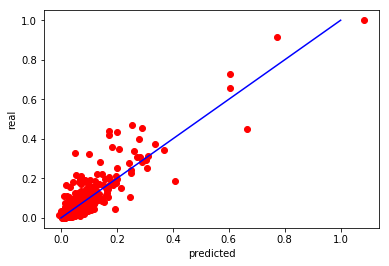

In [72]:
# ploting the p(errors) against the y - actual target values:

%matplotlib inline
pl.plot(p, y,'ro') # ro just means dots will show up as red circles
pl.plot([0,1],[0,1], 'b-') # this plots a straight line where b- means the line will be blue
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

Looking at the plot, our model looks fairly accurate, however, it would be helpful to do cross-validation to compare accuracy rates:

In [74]:
# using the script from our regression analysis notebook from class

a = 0.5 # for now, I'm just using the fixed value from class but I could also try various alpha levels
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(x,y)
    p = met.predict(x)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))
   
    #KFold 

    n = 10

    kf = KFold(n_splits=n, random_state=None, shuffle=False)

    # initialize the error to 0 - then we will add the errors and find the average
    # each time we go through the loop we find the RMSE on that particular fold
    # build a separate model on each different part of the training data and then compute RMSE each time
    xval_err = 0
    for train,test in kf.split(x):
        met.fit(x[train],y[train]) # calling our linear regression function on x and y - training data
        p = met.predict(x[test])
        e = p-y[test] # now compute the error predicted value minus actual target value 
        # now accumulate these error values by computing RMSE:
        xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
        # now accumulate these error values by computing RMSE:
        xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
    rmse_cv = xval_err/n # this gives the average of the k RMSE values of each of the folds
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_cv)
    print "\n"

Method: linear regression
RMSE on training: 0.0235
RMSE on 10-fold CV: 0.0544


Method: lasso
RMSE on training: 0.0529
RMSE on 10-fold CV: 0.0996


Method: ridge
RMSE on training: 0.0236
RMSE on 10-fold CV: 0.0508


Method: elastic-net
RMSE on training: 0.0529
RMSE on 10-fold CV: 0.0996




I can see from comparing models that the most accurately performing model is linear regression for our data, although ridge regression is very close in accuracy.  Lasso and elastic-net performed exactly the same and I'm curious about these results.  I also notice that using cross-validation has given us less accurate results.

#### For the second part of this analysis, I would like to perform item-based recommendation using some of my previous work from Assignment 4, and from class lectures and notes.  I would like to find similar talks based on the ratings and then provide output recommending these similar talks.

In [76]:
# I will be using the raw data from the ted talks, rather than the normalized data
name_counts.head(5)

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,views
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,47227110
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413,3200520
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230,1636292
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070,1697550
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893,12005869


In [129]:
# I don't think I will use views in this next section because I'm most interested in similar talks
# based on the descriptive words ratings, so I'll drop views here
name_counts = name_counts.drop('views', axis=1)

In [130]:
# I'm renaming this dataframe for more clarity
ted_talks = pd.DataFrame(name_counts)

In [131]:
ted_talks.head(5)

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893


In [132]:
# also I will use the simplified keys dataframe for this task so I can look at the talks that are most similar 
# from our set, but I'll simplify it even more for easier comparison below:
talks = keys['name']

In [133]:
talks.head(5)

0        Ken Robinson: Do schools kill creativity?
1             Al Gore: Averting the climate crisis
2                    David Pogue: Simplicity sells
3               Majora Carter: Greening the ghetto
4    Hans Rosling: The best stats you've ever seen
Name: name, dtype: object

In [135]:
talks = np.array(talks)

In [136]:
# In Assignment 4, we were performing the test and cross_validate_user functions, 
# which compare the accuracy of our predictions of ratings.  Initially, I could not figure out how this would 
# work with this particular data. There are over 2500 talks, and 14 descriptive word ratings.  The dataset
# has raw counts of viewers' ratings using the list of descriptive words.  So when I ran the test function on 
# "standEst" and svdEst, I'm assuming that I was testing the accuracy of descriptive ratings counts for the 
# specific talks. I still am a bit unclear on the use of these functions in providing recommendations.

In [137]:
from numpy import *
from numpy import linalg as la
import numpy as np

def ecludSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

def pearsSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]

def cosSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)

In [138]:
def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    for j in range(n):
        userRating = dataMat[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(dataMat[:,item]>0, 
                                      dataMat[:,j]>0))[0]
        if len(overLap) == 0: similarity = 0
        else: similarity = simMeas(dataMat[overLap,item], 
                                   dataMat[overLap,j])

        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [139]:
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig4 = mat(eye(4)*Sigma[:4]) #arrange Sig4 into a diagonal matrix
    xformedItems = data.T * U[:,:4] * Sig4.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T,
                             xformedItems[j,:].T)

        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [140]:
def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsSim):
    # I see that this function is based on multiple users who have rated items,
    # with the ted talk dataset, it has more to do with quantity of ratings.
    # I wonder if the functions will still work. This is an item-based 
    # recommendation analysis, similar to the jokes data from A4. - so rather than user,
    # I'm considering descriptive words being used as ratings - these are the columns vs 
    # the users.
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = test_ratio * len(rated_items_by_user)
    test_size = int(floor(test_size))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)

    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test item is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)

    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])	

    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]

    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u

In [141]:
def test(dataMat, test_ratio, estMethod):
    
    # function to iterate over all descriptive words and for each perform evaluation by calling
    # the above cross_validate_user function on each word. MAE will be the ratio of total error 
    # across all test cases to the total number of test cases, for all words.
    
    # call cross_validate_user on each descriptive word to find total MAE
    total_error = 0
    total_count = 0
    for i in range(len(dataMat)):
        error_u, count_u = cross_validate_user(dataMat, i, test_ratio, estMethod=standEst, simMeas=pearsSim)
        total_error += error_u
        total_count += count_u
    MAE = total_error/len(dataMat)
    print('Mean Absolute Error for {} : {}'.format(estMethod, MAE))

In [142]:
# I will get the data into the correct np.array format to test these functions
# this is already in the format of rows as talks(items) and columns as descriptive words
# used as ratings...these are not users but I will consider them as such since they are 
# cumulative user ratings.  
data_mat = np.array(ted_talks)
print(data_mat)

[[19645  4573  6073 ...,  1174   209 24924]
 [  544    58    56 ...,   203   131   413]
 [  964    60   183 ...,   146   142   230]
 ..., 
 [    1    14    19 ...,     4     0    30]
 [   63    21    37 ...,     5     7   147]
 [    0    12    14 ...,    11     4    26]]


In [143]:
# in assignment 4, in order to use the test function, we used the user by joke format
# and then in the print_most_similar_jokes function, we used the transposed data matrix to 
# compare jokes.  So I will transpose the data here in order to perform evaluation on our data:
data_mat_t = data_mat.T

In [144]:
print(data_mat_t)

[[19645   544   964 ...,     1    63     0]
 [ 4573    58    60 ...,    14    21    12]
 [ 6073    56   183 ...,    19    37    14]
 ..., 
 [ 1174   203   146 ...,     4     5    11]
 [  209   131   142 ...,     0     7     4]
 [24924   413   230 ...,    30   147    26]]


The above test functions are used to perform evaluation as we did in Assignment 4 (here I am using the same 20% test-ratio for each descriptive word rating, as I did in A4) and then the function compares MAE results using standard item-based collaborative filtering with results using the SVD item-based CF(We have used the rating prediction function "standEst" and have used "svdEst" as the prediction engine as we did in A4).

In [145]:
# test(data_mat_t, 0.2, svdEst)
# test(data_mat_t, 0.2, standEst) 

Mean Absolute Error for <function svdEst at 0x1a24a55a28> : 83156.3094279
Mean Absolute Error for <function standEst at 0x1a24a55140> : 82305.6689242


In [ ]:
# I commented out the above cell so that I do not accidentally run it again because it took so long to run.

# the output was:
# Mean Absolute Error for <function svdEst at 0x1a24a55a28> : 83156.3094279
# Mean Absolute Error for <function standEst at 0x1a24a55140> : 82305.6689242

In [ ]:
# I'm confused with the numbers outputted.  Seeing the MAE for svdEst at over 83,000 seems very high.  
# Perhaps this is because I used non-normalized data.  It does make sense to me that this number would be high
# because I'm working with millions of views and in at least the top case, hundreds of thousands of particular ratings.
# Initially, I did try to run the test function again on the normalized data, however, after waiting for a while,
# I decided to interrupt the kernal because it was taking too long. 
# The test function is an expensive function that 
# took over 20 minutes to run for svdEst and another 20 minutes for standEst.

In [ ]:
# Now I can proceed with recommending similar talks.  I will use the function from Assignment 4, 
# print_most_similar_jokes but change it to talks and will
# print out the output from the keys dataframe

In [147]:
def print_most_similar_talks(dataMat, talks, queryTalk, k, metric=pearsSim):
    # function to find the k most similar talks (based on word ratings by viewers) to a queried talk
    # The queryTalk is a talk id as given in our talks dataframe
    # Here we compare ratings for the queryTalk to all
    # other talk rating vectors and return the top k - this is the same as performing KNN based on the 
    # column ratings of dataMat.
      
    # for each row(talk) i - find the similarity between dataMat_t[i] and dataMat_t[queryTalk]
    # using Pearson similarity here, but could also use euclidean or cosine similarity:
    sims = np.array([metric(dataMat[queryTalk],dataMat[i]) for i in range(len(dataMat))])
    
    # using knn algorithm from class and A4 - getting distances then sort in increasing order
    distances = 1 - sims
    idx = np.argsort(distances) 
    top_k_talks = idx[1:k+1] # starting at 1, so we're not seeing the queryTalk as one of the most similar
    
    print("Selected Talk: \nTalk #{}: {}\n".format(queryTalk, talks[queryTalk]))
    print('Top {} recommended talks: \n'.format(k))
    for i in top_k_talks:
        print('Talk #{}: {}'.format(i,talks[i]))
        print('--'*20)

In [149]:
# printing out similar talks:
print_most_similar_talks(data_mat, talks, 100, 5, pearsSim)

Selected Talk: 
Talk #100: Natalie MacMaster: Cape Breton fiddling in reel time

Top 5 recommended talks: 

Talk #517: Imogen Heap: "Wait It Out"
----------------------------------------
Talk #115: Ethel: A string quartet plays "Blue Room"
----------------------------------------
Talk #209: Rokia Traore: "M'Bifo"
----------------------------------------
Talk #87: Caroline Lavelle: Casting a spell on the cello
----------------------------------------
Talk #2396: Sara Ramirez: "Rollercoaster"
----------------------------------------


In [150]:
print_most_similar_talks(data_mat, talks, 0, 5, pearsSim)

Selected Talk: 
Talk #0: Ken Robinson: Do schools kill creativity?

Top 5 recommended talks: 

Talk #653: Derek Sivers: How to start a movement
----------------------------------------
Talk #1129: Shawn Achor: The happy secret to better work
----------------------------------------
Talk #518: Jonathan Zittrain: The Web as random acts of kindness
----------------------------------------
Talk #1502: Ken Robinson: How to escape education's death valley
----------------------------------------
Talk #398: Mike Rowe: Learning from dirty jobs
----------------------------------------


#### Conclusion:



  In reviewing and analyzing the ted talk data, I found that the most difficult task for me was actually extracting the data from the dataframe, because the format was unfamiliar to me.  I spent many hours researching how to get the list of dictionaries into a useable format so that I could continue with my machine learning tasks.  
  I was able to perform basic descriptive statistics on some of the numeric variables that seemed to reflect overall popularity of the individual talks and I found that there was a positive correlation between the number of comments and the number of views.  I noticed a small positive correlation between the number of languages that the talk has been translated into and the popularity, ie views/comments, and I was able to visualize these relationships.
  Once I was able to get the data into a functional format by extracting the data in which I was most interested, I was able to begin my machine learning processes.  I began by performing linear regression on the ratings to see how accurately we could determine number of views, or the popularity of a talk.  Initially, I performed linear regression on non-nomalized data and the results were confusing because the prediction line in my visualization was not even on the graph.  I reperformed the regression analysis using normalized data, and I was able to see my prediction line and the accuracy of performance for a few different models.  
  Next, I chose to perform item-based recommendation for our talks.  Given the distribution of descriptive words, I was able to see which talks are most similar to a particular talk.  I printed out the output and at first glance, I can see the similarity between the talks.  I was, however, a little confused when I was using the functions from the book.  I still have some confusion about the use of these functions and the information that the test function gives us regarding item-based recommendations.  So I was not able to provide meaningful reflection on this section, nor was I able to interpret the results of the comparison between svdEst and standEst.  I would like to further my learning on recommendation systems.  
  Overall, I found the process of analyzing the ted talk data to be interesting and informative.  I look forward to continuing my studies in Machine Learning and really enjoyed this class!